<a href="https://colab.research.google.com/github/GitWahome/Simulation-and-Modelling/blob/master/Traffic_Flow_CS_166_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling the flow of traffic with rule 184

In [0]:
import random
from copy import copy
import numpy as np 
#resource http://www.programmersought.com/article/264757523/ 
        
class TrafficSimulation:
    """
    Base simulation class simulating traffic for a one lane highway using one dimensional cellular automata 
    """
    def __init__(self,road_length=100, traffic_density=0.03,max_velocity=5, slow_prob=0.5, simulation_runs = 5, verbose=False):
        """
        Constructor function 
        Args: 
            road_length (int)
            traffic_density(float)
            max_velocity(int)
            slow_prob(float)
            simulation_runs(int)
            
        """
        self.road_length = int(road_length)
        self.traffic_density = float(traffic_density) 
        self.max_velocity = int(max_velocity) 
        self.slow_prob = float(slow_prob)
        self.state = [-1]*self.road_length
        self.simulation_runs = int(simulation_runs)
        self.cross_count = 0
        self.verbose = verbose
        self.initialize_state()
        
        
    def initialize_state(self):
        """
        Creates random starting positions for the specified number of cars.
        Args: 
            None
        Returns: 
            None
        """
        #car positions 
        positions = random.sample(range(self.road_length), int(self.traffic_density*self.road_length))
        #insert values at each position with starting velocities 
        for position in positions:
            self.state[position] = random.randint(0,self.max_velocity)
            
            
    def display(self):
        """
        Prints the state of the simulation when called. Dots for empty spaces on the road and an integer value 
        to represent a car on the road by it's velocity
        """
        if self.verbose:
            print(''.join('.' if x == -1 else str(x) for x in self.state))
        
    def update_states(self):
        """
        Step through the simulation executing first 3 update steps in one for loop and a second for loop 
        to move the 'cars'
        """
        #preserve old state
        old_state = copy(self.state)
        #update velocities 
        for i in range(self.road_length):
            if old_state[i] != -1:
                #increment speed if it is not alredy max 
                if (old_state[i] + 1) <= self.max_velocity:
                    new_speed = old_state[i] + 1
                else:
                    new_speed = old_state[i]
                #update speed 
                #self.state[i] = new_speed #don't update speed yet
                #slow down
                #while we haven't encountered 0, continue getting next cell and increment box counter
                box_counter = 0
                next_cell_index = i
                for _ in range(self.max_velocity):
                    #get next cell, check if -1 and if so add to box_counter
                    if old_state[(next_cell_index+1) % (self.road_length)] == -1:
                        box_counter += 1
                        next_cell_index = (next_cell_index+1) % (self.road_length)
                    else:
                        break 
                #check box_counter and update new_speed as appropriate.
                if new_speed > box_counter:
                    new_speed = box_counter
                
                #randomly reduce the speed by 1 based on the given probability 
                if random.random() < self.slow_prob:
                    if new_speed > 0:
                        new_speed -= 1 
                    
                #finally update the speed to self.state
                self.state[i] = new_speed
                        
                    
        #visualize before updating positions 
        self.display()
            
        #update positions by moving forward these speeds
        # update the old state variable to use again 
        old_state = copy(self.state)
        for k in range(self.road_length):
            if old_state[k] != int(-1):
                #According to the second rule, no collisions will occur therefore we can just move as we 
                # pass through the list
                #print('next state is',((i+self.state[i])%(self.road_length)))
                #print('self.state just before update',self.state)
                self.state[((k+old_state[k])%(self.road_length))] = copy(old_state[k])
                #add to traffic flow counter i.e if the next state is less than current, then it crossed
                #the periodic boundary 
                if ((k+old_state[k])%(self.road_length)) < k:
                    self.cross_count += 1
                #reset the vacated cell to -1 
                #if the velocity is zero, don't reset state
                if old_state[k] == 0:
                    pass 
                else:
                    self.state[k] = -1
                
                
    def run(self):
        """
        Runs the simulation a certain number of steps 
        """
        for _ in range(self.simulation_runs):
            self.update_states()
            

        
        

In [0]:
# to generate figure 1
model1 = TrafficSimulation(traffic_density=0.03, simulation_runs=15, verbose=True)
model1.run()

...................................................................2..............1.3...............
.....................................................................2.............1...4............
.......................................................................3............1......4........
..........................................................................4..........2.........4....
..............................................................................4........3...........4
...5..............................................................................4.......3.........
........5.............................................................................5......4......
.............5.............................................................................5.....5..
..4...............5.............................................................................5...
.3....5................5...................................................................

In [0]:
# to generate figure 2 
model2 = TrafficSimulation(traffic_density=0.1, simulation_runs=15, verbose=True)
model2.run()

..........4..............1.....001........3.........2...........4...............5........3..........
..............5...........1....01.1..........4........3.............5................4......4.......
...................5.......2...0.0.2.............4.......3...............5...............4......5...
.5......................3....0.1.0...3...............4......3.................5..............4......
......4....................1.1..00......3................5.....4...................4.............4..
.4........5.................0.0.01.........3..................3....5...................4............
.....5.........4............1.1.1.1...........3..................4......5..................5........
..........5........5.........0.0.0.2.............4...................5.......4..................5...
.5.............4........3....1.1.1...2...............5....................4......5..................
......5............4.......2..0.0.1....3..................4...................4.......4....

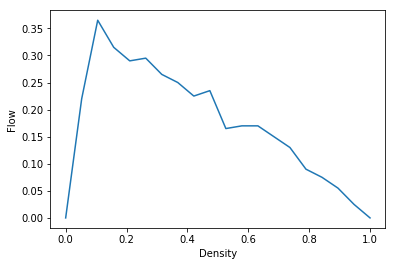

In [0]:
#visualization
import matplotlib.pyplot as plt 
import numpy as np
def run_simulation(road_length=100,max_velocity=5, slow_prob=0.5, simulation_runs = 5, verbose=False, density_runs=20):
    densities = []
    traffic_flows = []
    for i in np.linspace(0,1,20):
        mod1 = TrafficSimulation(traffic_density=i, simulation_runs=simulation_runs)
        mod1.run()
        densities.append(i)
        traffic_flows.append(mod1.cross_count/simulation_runs)
        del mod1 
    
    #plotting
    plt.plot(densities,traffic_flows)
    plt.ylabel('Flow')
    plt.xlabel('Density')
    plt.show()
    
run_simulation(road_length=100,max_velocity=5, slow_prob=0.5, simulation_runs = 200, verbose=False, density_runs=20)
    
    


In [0]:
import numpy as sp
import matplotlib.pyplot as plt

class TrafficSimulation:
    
    def __init__(self, road_length=100, traffic_density=0.1, max_v=5, p_slow=0.5):
        self.road_length= road_length
        self.traffic_density= traffic_density
        self.max_v= max_v
        self.p_slow= p_slow
        #we use -1 to represent empty cells
        self.cells = np.zeros(road_length,dtype=np.int64)
        self.flow_record = []
        self.frames = []
    
    
    def initialize(self):

        self.cells.fill(-1)      
        #we select the number of arrays that will have cars, matching the traffic density parameter 
        random_cells = sp.random.choice(range(self.road_length), size= int(round(self.traffic_density * self.road_length)), replace=False)
        
        #we replace according to the density by 1 that will represent a car in the cars
        self.cells.flat[random_cells]=1
        
        if len(random_cells) >0:
            self.cells.flat[random_cells[0]]=3
            
        self.time_step=0
        self.changed= True 
        
    def update_rules(self):
        
        self.time_step +=1
        next_state = -1*np.ones(self.cells.shape, dtype=np.int64)        
        
        self.flow_map= np.zeros(self.cells.shape, dtype=np.int64)
        cars = np.where(self.cells >=0)[0]
        prev_car = [cars[(i-1)%len(cars)] for i in range(len(cars))]
        next_car = [cars[(i+1)%len(cars)] for i in range(len(cars))]
        def car_distance(x,y):
            if y > x: return y - x
            else: return self.cells.shape + (y - x)
            
        def middle_point(x,y):
            if y > x: return (x+y)/2
            else: return ((x + y+self.cells.shape)/2)%self.cells.shape    
        
        for i,car in enumerate(cars):
            
            if car_distance(car, next_car[i]) < self.cells[car] + 1:
                self.cells[car]=min(car_distance(car, next_car[i]) - 1, 1)
            
            
            elif prev_car[i] < car < next_car[i]:
                if car > middle_point(prev_car[i],next_car[i]):
                    if self.cells[car] > 0:
                        self.cells[car]-=1

                elif car < middle_point(prev_car[i],next_car[i]):
                    if self.cells[car] < 5:
                        self.cells[car]+=1
                else:
                    self.cells[car]=1
                    
            elif car < prev_car[i]:
                if car < middle_point(prev_car[i],next_car[i]) < next_car[i]:
                    if self.cells[car] < 5:
                        self.cells[car]+=1
                elif car == middle_point(prev_car[i],next_car[i]):
                    self.cells[car]=1
                else:
                    if self.cells[car] > 0:
                        self.cells[car]-=1
            
            else:
                if prev_car[i] < middle_point(prev_car[i],next_car[i]) < car:
                    if self.cells[car] > 0:
                        self.cells[car]-=1
                elif car == middle_point(prev_car[i],next_car[i]):
                    self.cells[car]=1
                else:
                    if self.cells[car] < 0:
                        self.cells[car]+=1
                        
        for i in cars[np.where(self.cells[cars]>0)]: 
            if np.random.random() < self.p_slow:
                self.cells[i] -=1
                
        for x in cars:
            next_state[(x+self.cells[x])%self.cells[0]]= self.cells[x]
            if self.cells[x]>0:
                for s in range(x, (x+self.cells[x])%self.cells.shape[0]):
                    self.flow_map[s]+=1
                    
        self.flow_record.append(np.mean(self.flow_map))
        self.cells = next_state
    
    def update(self):
        
        self.frames.append(self.cells.reshape(1,sim.cells.shape[0]))
        self.time_step += 1
        next_state = -1*np.ones(self.cells.shape,dtype=np.int64)
        
        self.flow_map = np.zeros(self.cells.shape,dtype=np.int64)
        
        cars = np.where(self.cells >= 0)[0]
        next_car = [cars[(i+1)%len(cars)] for i in range(len(cars))]
                
        def car_distance(x,y):
            if y > x: return y - x
            else: return self.cells.shape + (y - x)

        for i,car in enumerate(cars):
            if self.cells[car] < self.max_v and car_distance(car, next_car[i]) > self.cells[car] + 1:
                self.cells[car] += 1
            else: self.cells[car] = min(car_distance(car, next_car[i]) - 1, self.cells[car])
        for i in cars[np.where(self.cells[cars]>0)]: 
            if np.random.random() < self.p_slow:
                self.cells[i] -=1
        for x in cars:
            next_state[(x+self.cells[x])%self.cells[0]]= self.cells[x]
            if self.cells[x]>0:
                for s in range(x, (x+self.cells[x])%self.cells.shape[0]):
                    self.flow_map[s]+=1
                    
        self.flow_record.append(np.mean(self.flow_map))
        self.cells = next_state

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: RuntimeWarning: divide by zero encountered in longlong_scalars


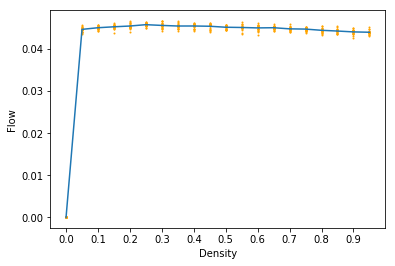

In [0]:
sim = TrafficSimulation(road_length=100,traffic_density=0.15, p_slow = 0.25)
sim.initialize()

flow = []
densities = np.array([x*np.ones(20) for x in np.arange(0,1,0.05)]).ravel()

for d in densities:
    sim = TrafficSimulation(road_length=100,traffic_density=d, p_slow = 0.5)
    sim.initialize()
    for t in range(200):
        sim.update()
    flow.append(np.mean(sim.flow_record))

density_value, average_flow = zip(*sorted((xVal, np.mean([yVal for a, yVal in zip(densities, flow) if xVal==a])) for xVal in set(densities)))
    
plt.plot(density_value,average_flow)
plt.scatter(densities,flow,c='orange',s=1)
plt.xticks(np.arange(0,1,0.1))
plt.ylabel('Flow')
plt.xlabel('Density')
plt.show()

In [0]:
22%100


22

In [0]:
(99+5)%(100)


4

In [0]:
type(-1)

int

In [0]:
#### backup 


import random
from copy import copy
#resource http://www.programmersought.com/article/264757523/ 
        
class TrafficSimulation:
    """
    Base simulation class simulating traffic for a one lane highway using one dimensional cellular automata 
    """
    def __init__(self,road_length=100, traffic_density=0.03,max_velocity=5, slow_prob=0.5, simulation_runs = 5):
        """
        Constructor function 
        Args: 
            road_length (int)
            traffic_density(float)
            max_velocity(int)
            slow_prob(float)
            simulation_runs(int)
            
        """
        self.road_length = int(road_length)
        self.traffic_density = float(traffic_density) 
        self.max_velocity = int(max_velocity) 
        self.slow_prob = float(slow_prob)
        self.state = [-1]*self.road_length
        self.simulation_runs = int(simulation_runs)
        self.initialize_state()
        
        
    def initialize_state(self):
        """
        Creates random starting positions for the specified number of cars.
        Args: 
            None
        Returns: 
            None
        """
        #car positions 
        positions = random.sample(range(self.road_length), int(self.traffic_density*self.road_length))
        #insert values at each position with starting velocities 
        for position in positions:
            self.state[position] = random.randint(0,self.max_velocity)
            
            
    def display(self):
        """
        Prints the state of the simulation when called. Dots for empty spaces on the road and an integer value 
        to represent a car on the road by it's velocity
        """
        print(''.join('.' if x == -1 else str(x) for x in self.state))
        
    def update_states(self):
        """
        Step through the simulation executing first 3 update steps in one for loop and a second for loop 
        to move the 'cars'
        """
        #preserve old state
        old_state = copy(self.state)
        #update velocities 
        for i in range(self.road_length):
            if old_state[i] != -1:
                #increment speed if it is not alredy max 
                if (old_state[i] + 1) <= self.max_velocity:
                    new_speed = old_state[i] + 1
                else:
                    new_speed = old_state[i]
                #update speed 
                #self.state[i] = new_speed #don't update speed yet
                #slow down
                #while we haven't encountered 0, continue getting next cell and increment box counter
                box_counter = 0
                next_cell_index = i
                for _ in range(self.max_velocity):
                    #get next cell, check if -1 and if so add to box_counter
                    if old_state[(next_cell_index+1) % (self.road_length)] == -1:
                        box_counter += 1
                        next_cell_index = (next_cell_index+1) % (self.road_length)
                    else:
                        break 
                #check box_counter and update new_speed as appropriate.
                if new_speed > box_counter:
                    new_speed = box_counter
                
                #randomly reduce the speed by 1 based on the given probability 
                if random.random() < self.slow_prob:
                    if new_speed > 0:
                        new_speed -= 1 
                    
                #finally update the speed to self.state
                self.state[i] = new_speed
                        
                    
        #visualize before updating positions 
        self.display()
            
        #update positions by moving forward these speeds
        # update the old state variable to use again 
        old_state = copy(self.state)
        for k in range(self.road_length):
            if old_state[k] != int(-1):
                #According to the second rule, no collisions will occur therefore we can just move as we 
                # pass through the list
                #print('next state is',((i+self.state[i])%(self.road_length)))
                #print('self.state just before update',self.state)
                self.state[((k+old_state[k])%(self.road_length))] = copy(old_state[k])
                #reset the vacated cell to -1 
                self.state[k] = -1
                
                
    def run(self):
        """
        Runs the simulation a certain number of steps 
        """
        for _ in range(self.simulation_runs):
            self.update_states()
            

        
        